In [ ]:
from PIL import Image as img
from IPython.display import Image 
from os import listdir
from os.path import isfile, join
import random

In [ ]:
class LayeredImage:
  def __init__(self, base):
    self.__base = base

  #assumes opened image
  def add_layer(self, layer):
    self.__base.paste(layer, (0,0), mask=layer)

  def show_image(self):
    display(self.__base)

  def save_image(self, file_name):
    rgb_base = self.__base.convert('RGB')
    rgb_base.save(file_name)

  def get_base(self):
    return self.__base
  

In [ ]:
class ChipGenerator:
  def __init__(self):
    self.body = self.get_files("./Body")
    self.extras = self.get_files("./Extras")
    self.faces = self.get_files("./Faces")
    self.glasses = self.get_files("./Glasses")
    self.hats = self.get_files("./Hats")
    self.necklaces = self.get_files("./Necklaces")
    self.pants = self.get_files("./Pants")
    self.shoes = self.get_files("./Shoes")
    
  def get_files(self, path):
    return [f for f in listdir(path) if isfile(join(path, f))]

  def get_default_weights(self, files):
    return [1/len(files)] * len(files)

  def get_random_image(self, path, data, dist = None):
    if dist == None:
      dist = self.get_default_weights(data)
    image_name = random.choices(data, dist, k=1)[0]
    try:
      return img.open(path + image_name)
    except IOError:
      raise IOError

  def construct_chip_image(self, extras_prob = [0.0005, 0.9995]):
    extras_flag = random.choices([True, False], extras_prob, k=1)[0]
    try:
      shoe_image = self.get_random_image("./Shoes/", self.shoes)
      chip = LayeredImage(shoe_image)
      pants_image = self.get_random_image("./Pants/", self.pants)
      chip.add_layer(pants_image)
      body_image = self.get_random_image("./Body/", self.body)
      chip.add_layer(body_image)
      necklace_image = self.get_random_image("./Necklaces/", self.necklaces)
      chip.add_layer(necklace_image)
      face_image = self.get_random_image("./Faces/", self.faces)
      chip.add_layer(face_image)
      if extras_flag:
        extras_image = self.get_random_image("./Extras/", self.extras)
        chip.add_layer(extras_image)
      else:
        glasses_image = self.get_random_image("./Glasses/", self.glasses)
        chip.add_layer(glasses_image)
        hat_image = self.get_random_image("./Hats/", self.hats)
        chip.add_layer(hat_image)
      return chip
    except IOError:
      raise IOError

    
  # def nstruct_k_chip_images(self, k):
  #   chips = []
  #   for i in range(k):
  #     chip = self.construct_chip_image()
  #     chips.append([chips])
  #   return chips
  #   co

Run this cell to generate a random chip with extra
Takes about 15-20 seconds

In [ ]:
gen = ChipGenerator()
chip = gen.construct_chip_image([1,0])
chip.show_image()

Run This cell to generate a random chip
takes about 15-20 seconds

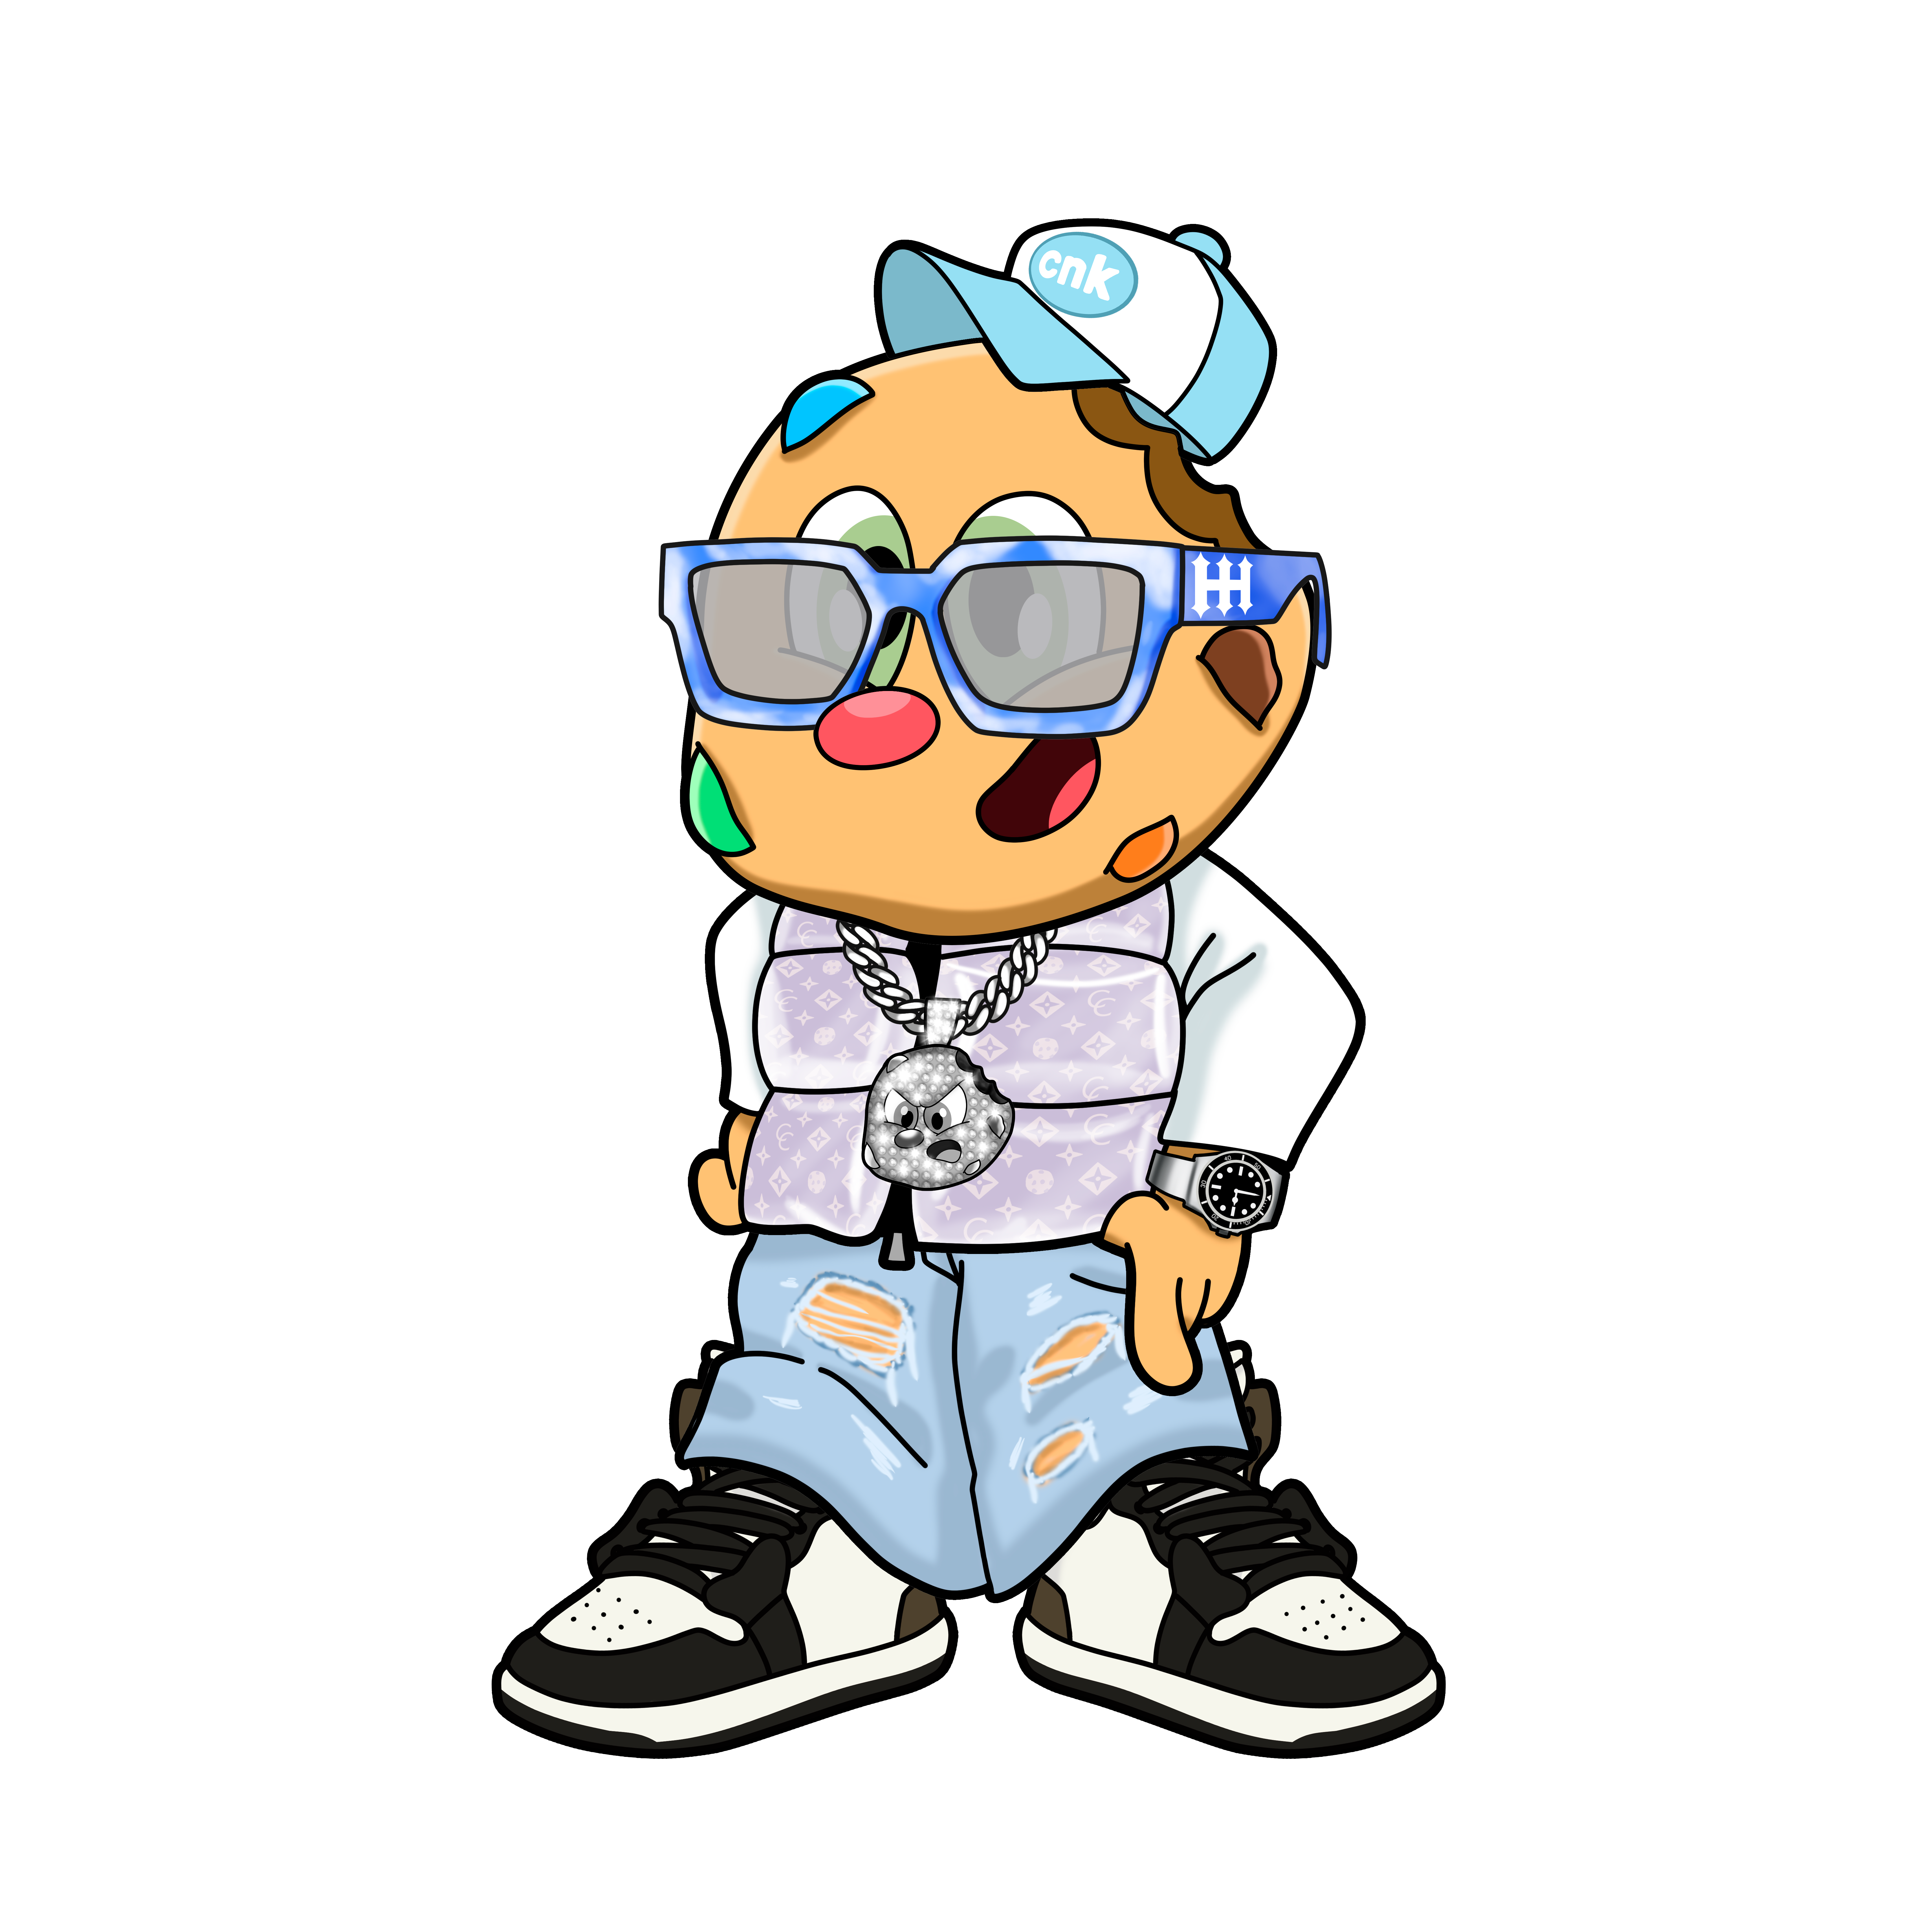

In [ ]:
gen = ChipGenerator()
chip = gen.construct_chip_image()
chip.show_image()
